# Text Classification Exercises

## Exercise 1: Dataset Exploration

**Objective**: Familiarize yourself with the dataset.

1. Load the **News Category Dataset** (News_Category_Dataset_v3.json), which contains approximately 210,000 news headlines from 2012 to 2022. **Hint: read the file with Python, parse it with the json library and convert it to a pandas DataFrame.** **Note: you need to extract the file from the zip archive before loading it.**
2. Identify the target label.
3. Which features do you find relevant for the classification task?
4. Perform exploratory data analysis (EDA):
   - Check for any missing values.
   - Visualize the distribution of categories.


In [26]:
import json
import pandas as pd

with open("../../data/News_Category_Dataset_v3.json", 'r') as f:
    data = f.read()

json_data = [json.loads(line) for line in data.split('\n') if line]
df = pd.DataFrame(json_data)

df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [27]:
df = df[['headline', 'category', 'short_description']]
df.head()

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...


In [28]:
df['category'].value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

In [29]:
top10 = df['category'].value_counts().nlargest(10)

top10

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
Name: count, dtype: int64

In [30]:
top10 = top10.index

df_i = df[df['category'].isin(top10)]
df_i

,headline,category,short_description
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
20,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv..."
21,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.
24,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...
28,James Cameron Says He 'Clashed' With Studio Be...,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009..."
...,...,...,...
209509,Walmart Waving Goodbye To Some Greeters,BUSINESS,"After 30 years, ""People Greeters"" will no long..."
209510,"At World Economic Forum, Fear of Global Contag...",BUSINESS,"For decades, as crises have assailed developin..."
209511,Positive Customer Experience: What's the Retur...,BUSINESS,"""Analysts at Adobe combined historical purchas..."
209512,"Sundance, Ice-T, and Shades of the American Ra...",ENTERTAINMENT,Representation of the collective diaspora has ...


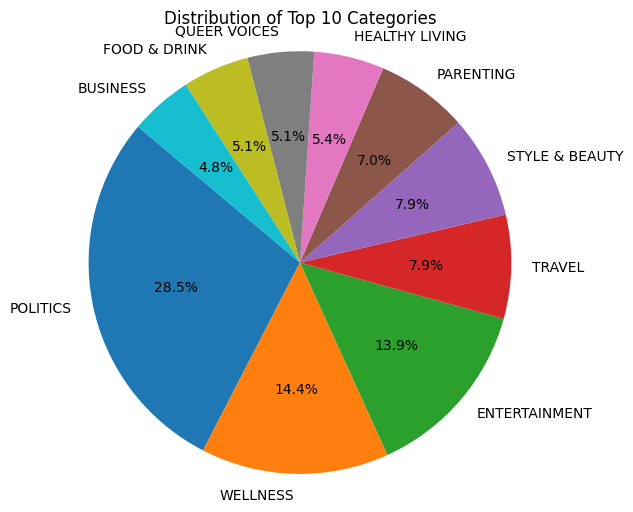

In [31]:
import matplotlib.pyplot as plt
category_counts = df_i['category'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 10 Categories')
plt.axis('equal')
plt.show()

## Exercise 2: Text Preprocessing

**Objective**: Prepare the text data for classification tasks.

1. Preprocess the "headline" and "short_description" fields by performing the following steps:
   - Convert all text to lowercase.
   - Remove punctuation, digits, and any other irrelevant characters.
   - Remove stop words.
   - Apply either stemming or lemmatization.
2. Observe how the data changes at each step of preprocessing.
3. Create a new column that concatenates the processed "headline" and "short_description" fields.

## Exercise 3: Data Splitting

**Objective**: Split the dataset into training and testing sets.

1. Divide the data into **training** and **testing** sets.
   - Use an appropriate train-test split ratio (e.g., 80-20 or 70-30).
   - Ensure the split is **stratified** to maintain the distribution of categories.
   

## Exercise 4: Feature Extraction

**Objective**: Convert the text data into numerical features.

1. Apply one of the following feature extraction techniques:
   - **Bag-of-Words (BoW)**
   - **TF-IDF**
   - Optionally, apply N-grams (unigrams, bigrams, etc.) before feature extraction.
2. Use either the **sklearn** or **nltk** packages for feature extraction.

## Exercise 5: Clustering

**Objective**: Cluster news articles based on their content.

1. Apply KMeans clustering to group news articles into 42 clusters.
2. Visualize the clusters using PCA or t-SNE.

## Exercise 6: Model Training

**Objective**: Train machine learning models for text classification.

1. Train various machine learning models on the preprocessed and vectorized data.
   - Choose models from the **sklearn** library (e.g., Logistic Regression, Random Forest, SVM).
   

## Exercise 7: Model Evaluation

**Objective**: Evaluate the performance of the trained models.

1. Evaluate the models using appropriate metrics such as accuracy, precision, recall, and F1-score.
2. Perform **cross-validation** on at least one model to ensure reliable performance evaluation.
